# ინტერნეტ მაღაზია – სრული ვერსია

## წინათქმა

* პროექტის განხილვა

* პროექტის საქაღალდის შექმნა `September Burned/enf`

* ვირტუალური გარემოს დაყენება

* ჯანგოსა და დამატებითი პაკეტების დაყენება  
  `pip install django pillow mysqlclient python-dotenv`  
  `pip freeze > requiremets.txt`

* ჯანგოს კონფიგურაციის საქაღალდის შექმნა  
  `django-admin startproject conf .`

*  `manage.py`, `conf/settings.py` და `conf/urls.py` ფაილების განხილვა

---

შევიდეთ `settings.py` ფაილში და პირველდი კონფიგურაცია გავაკეთოთ

`conf/settings.py`

```py
from pathlib import Path
import os
from dotenv import load_dotenv

load_dotenv()

...
```
---

შემდეგ, პროექტის მთავარ საქაღალდეში შევქმნათ `.env` ფაილი.

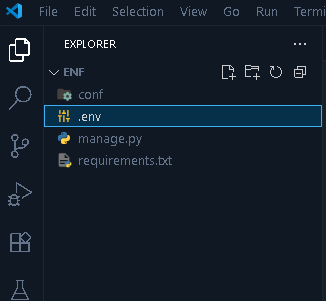

---

`settings.py` ფაილიდან ამოვჭრათ `SECRT_KEY`-ს მნიშვნელობა და მოვათავსოთ `.env` ფაილში.

`conf/settings.py`

```py
...

# SECURITY WARNING: keep the secret key used in production secret!
SECRET_KEY = os.getenv('SECRET_KEY')

...
```
---

`.env`

```py
SECRET_KEY='django-insecure-$^4ctfrh#n#-w$i7iearz7665+xvvh_5u_g^!tb&0no)j%vjj8'
```
___

ახლა შევცვალოთ მონაცემთა ბაზა `settings.py`-ში

`conf/settings.py`

```py
...

# Database
# https://docs.djangoproject.com/en/5.2/ref/settings/#databases

DATABASES = {
  'default': {
    'ENGINE': 'django.db.backends.mysql',
    'NAME': os.getenv('MYSQL_DB'),
    'USER': os.getenv('MYSQL_USER'),
    'PASSWORD': os.getenv('MYSQL_PASSWORD'),
    'HOST': os.getenv('MYSQL_HOST', 'localhost'),
    'PORT': os.getenv('MYSQL_PORT', '3306'),
    'OPTIONS': {
      'init_command': "SET sql_mode='STRICT_TRANS_TABLES'",
    },
  }
}

...
```
---

`.env`

```py
...

MYSQL_DB=enfdb
MYSQL_USER=pm72
MYSQL_PASSWORD=admin1234
MYSQL_HOST=localhost
MYSQL_PORT=3306
```
---

შევქმნათ მონაცემთა ბაზა `enfdb`

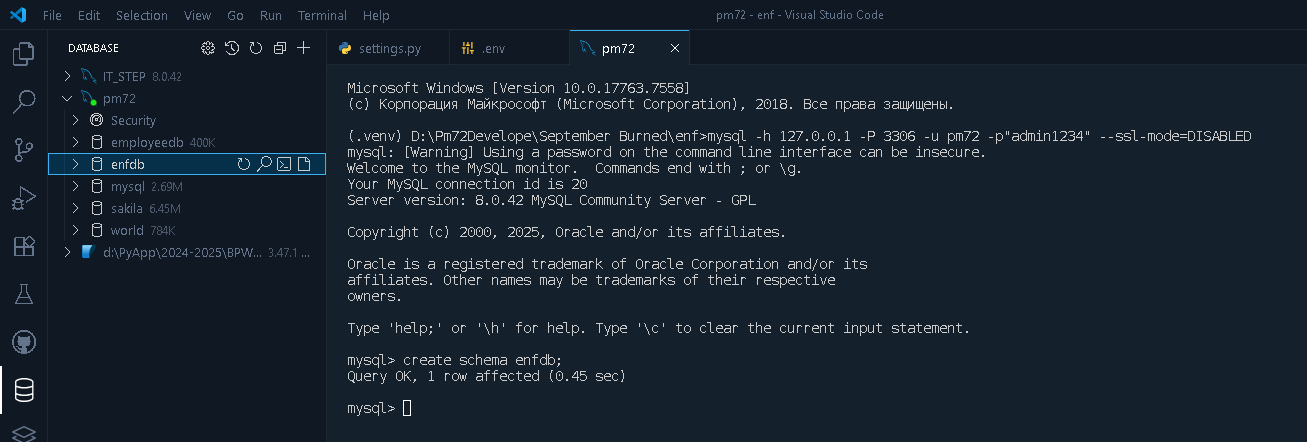

___

მედია ფაილებთან სამუშაოდ შევქმნათ ორი კონსტანტა: `MEDIA_URL` და `MEDIA_ROOT`

`conf/settings.py`

```py
...

STATIC_URL = 'static/'

MEDIA_URL = '/media/'
MEDIA_ROOT = BASE_DIR / 'media'

...
```
---

`conf/urls.py`

```py
from django.contrib import admin
from django.urls import path

from django.conf import settings
from django.conf.urls.static import static

urlpatterns = [
    path('admin/', admin.site.urls),
]

if settings.DEBUG:
  urlpatterns += static(settings.MEDIA_URL, document_root=settings.MEDIA_ROOT)
```
---

გავუშვათ პირველადი მიგრაცია

`py manage.py migrate`

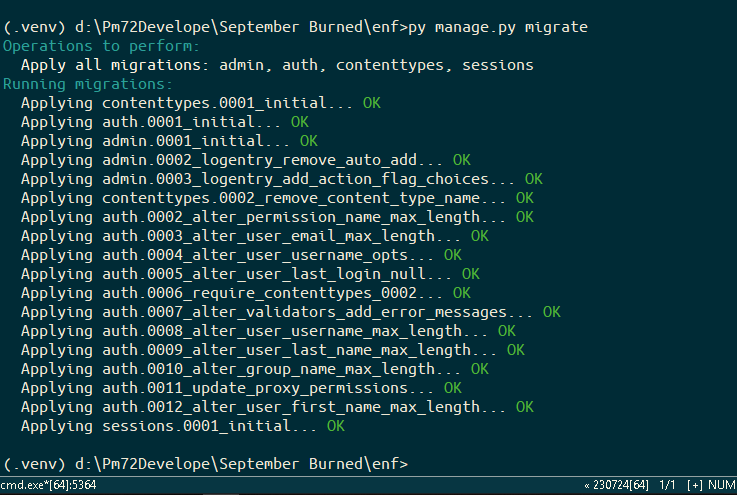

___

* შევქმნათ აპლიკაცია `main`
  `py manage.py startapp main`

* `main` აპლიკაცია დავარეგისტრიროთ `settimgs.py` ფაილში
---

## პროდუქტის მოდელის შექმნა

__რა შეიძლება ჰქონდეს ჩვენს პროდუქტს?__

* `category` – კატეგორია (ცალკე მოდელი)
* `size` – ტანსაცმლის ზომა (ცალკე მოდელი). მაგ.: L, M, XL, XM ...
* `name` – სახელი
* `slug` – სლაგი
* `color` – ფერი
* `price` – ფასი
* `description` – აღწერა
* `images` – ილუსტრაციები
* `created_at` – შექმნის თარიღი
* `updated_at` – ბოლო განახლების თარიღი
___

`main/models.py`

```py
from django.db import models
from django.utils.text import slugify


class Category(models.Model):
  name = models.CharField(max_length=100)
  slug = models.SlugField(max_length=100, unique=True)


  def save(self, *args, **kwargs):
    if not self.slug:
      self.slug = slugify(self.name)

    super().save(*args, **kwargs)


  def __str__(self):
    return self.name


class Size(models.Model):
  name = models.CharField(max_length=20)


  def __str__(self):
    return self.name


class productSize(models.Model):
  product = models.ForeignKey('Product', on_delete=models.CASCADE, related_name='product_size')
  size = models.ForeignKey(Size, on_delete=models.CASCADE)
  stock = models.PositiveIntegerField(default=0)


  def __str__(self):
    return f"{self.size.name} ({self.stock} in stock) for {self.product.name}"


class Product(models.Model):
  name = models.CharField(max_length=100)
  slug = models.SlugField(max_length=100, unique=True)
  category = models.ForeignKey(Category, on_delete=models.CASCADE, related_name='products')
  color = models.CharField(max_length=100)
  price = models.DecimalField(max_digits=10, decimal_places=2)
  description = models.TextField(blank=True)
  main_image = models.ImageField(upload_to='products/main/')
  created_at = models.DateTimeField(auto_now_add=True)
  updated_at = models.DateTimeField(auto_now=True)


  def save(self, *args, **kwargs):
    if not self.slug:
      self.slug = slugify(self.name)

    super().save(*args, **kwargs)


  def __str__(self):
    return self.name


class ProductImage(models.Model):
  product = models.ForeignKey(Product, on_delete=models.CASCADE, related_name='images')
  image = models.ImageField(upload_to='products/extra/')
```
---

გავაკეთოთ მიგრაციები:

`py manage.py makemigrations`

`py manage.py migrate`

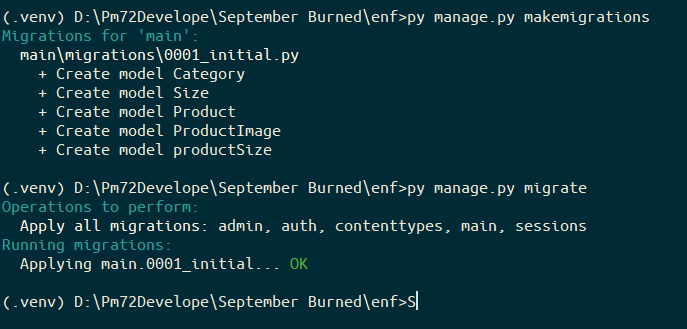

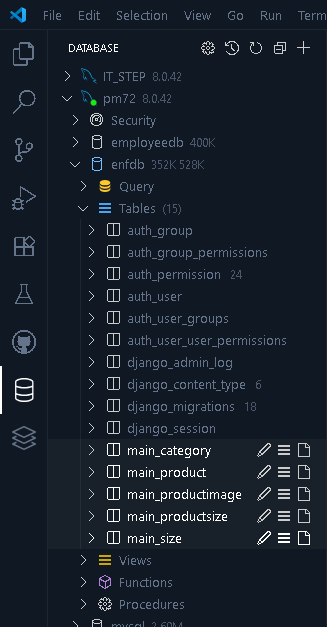
___

## პროექტის github-ზე ატვირთვა

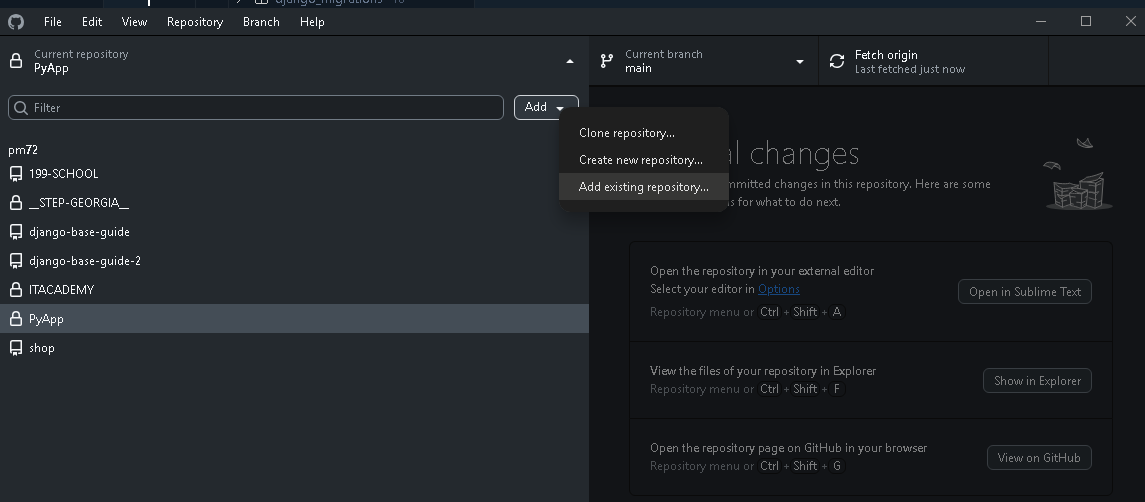

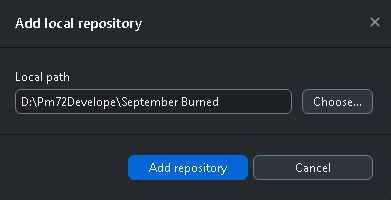 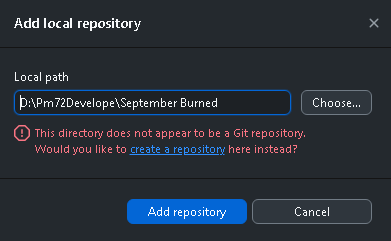

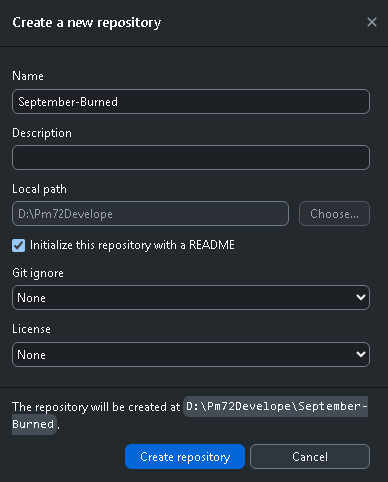

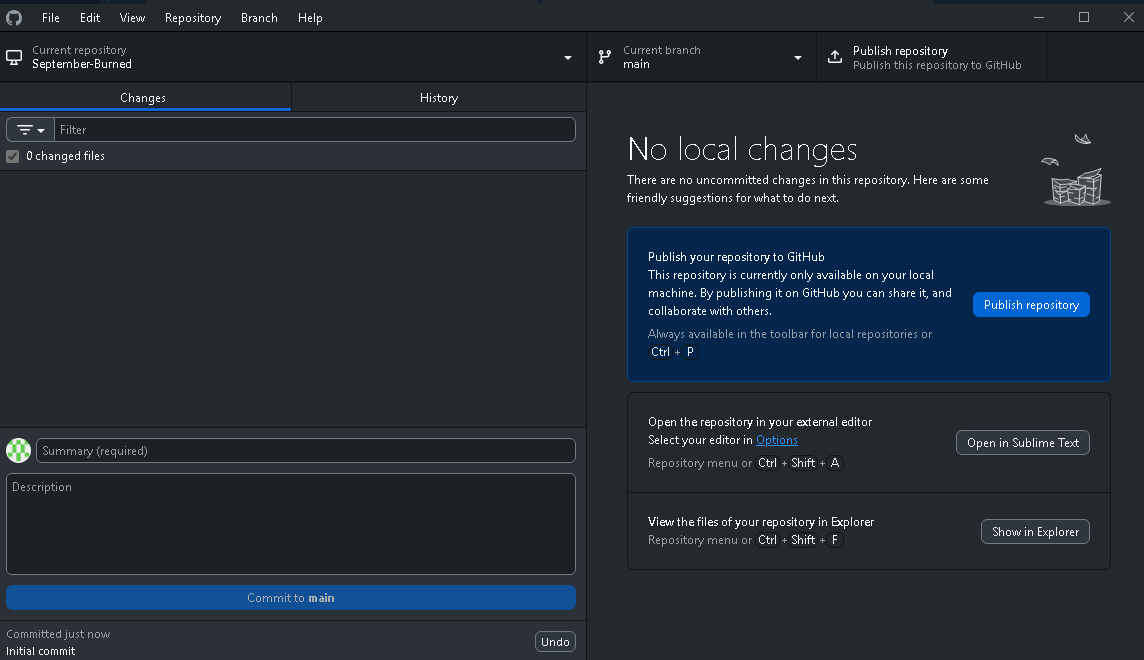

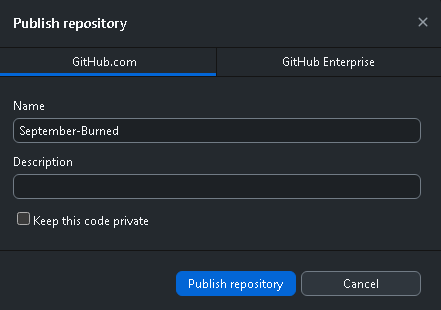

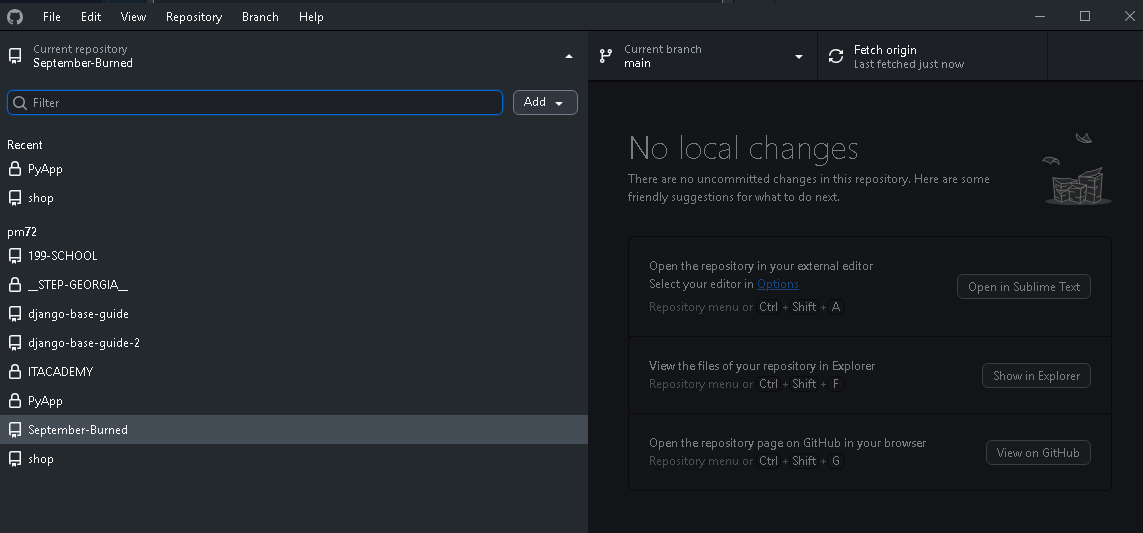

___

## 

ახლა ჩვენი მოდელები დავარეგისტრიროთ ადმინ-პანელში.